In [2]:
%pylab
%matplotlib inline

from pylab import *
from scipy.fftpack import fft, ifft
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, dst

# For importing CSV into numpy array
from numpy import genfromtxt

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


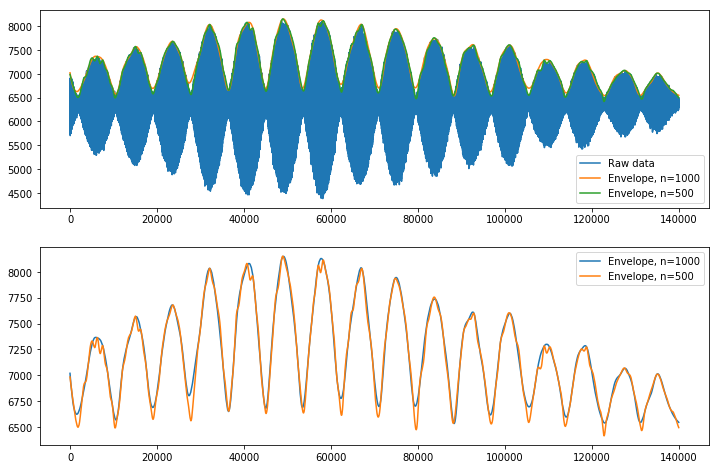

In [90]:
fig = plt.figure(figsize=(12,8))
fig.tight_layout()
sub = fig.add_subplot(2,1,1)
zpl = genfromtxt("408-michelson-csv/zpl.csv", delimiter=",")
zpl = zpl[40000 - 1:]
I0  = linspace(0,len(zpl),num=len(zpl))

zpl_env_1000 = genfromtxt("408-michelson-csv/env1000.csv", delimiter=",")
zpl_env_500  = genfromtxt("408-michelson-csv/env500.csv", delimiter=",")

sub.plot(I0, zpl, label="Raw data")
sub.plot(I0, zpl_env_1000, label="Envelope, n=1000")
sub.plot(I0, zpl_env_500, label="Envelope, n=500")
sub.legend()

sub = fig.add_subplot(2,1,2)
sub.plot(I0, zpl_env_1000, label="Envelope, n=1000")
sub.plot(I0, zpl_env_500, label="Envelope, n=500")
sub.legend()

min_is = np.where(zpl_env_1000 < 6900)[0]
max_is = np.where(zpl_env_1000 > 6900)[0]

In [75]:
prev = -1
small = -1
big = -1
mins = []

for curr in min_is:
    if small == -1:
        small = curr
    elif (curr - prev) != 1 or curr == min_is[-1]:
        big = prev
        values = zpl_env_1000[small:big+1]
        
        min_i = small + np.where(values == min(values))[0][0]
        mins.append(min_i)
        small = curr
    prev = curr

prev = -1
small = -1
big = -1
maxs = []

for curr in max_is:
    if small == -1:
        small = curr
    elif (curr - prev) != 1 or curr == max_is[-1]:
        big = prev
        values = zpl_env_1000[small:big+1]
        
        max_i = small + np.where(values == max(values))[0][0]
        maxs.append(max_i)
        small = curr
    prev = curr

# print("{}".format(list(zip(range(len(mins)), mins))))
# print("{}".format(list(zip(range(len(maxs[1:])), maxs[1:]))))
print("min positions: {}".format(mins[:-1])) # the last min is a false min
print("max positions: {}".format(maxs[1:])) # the first max is a false maximum

diffs = []
for i in range(len(mins[:-1])):
    if i == 0:
        pass
    else:
        diffs.append(mins[i] - mins[i-1])
        
print("average min diff: {}".format(1.*sum(diffs)/len(diffs)))

diffs = []
for i in range(len(maxs[1:])):
    if i == 0:
        pass
    else:
        diffs.append(mins[i] - mins[i-1])
print("average max diff: {}".format(1.*sum(diffs)/len(diffs)))

min positions: [1538, 10557, 19010, 27334, 36416, 44997, 53430, 62260, 71004, 79341, 88277, 96601, 105501, 114033, 122877, 131075]
max positions: [5901, 15197, 23495, 32066, 41117, 49030, 57709, 66882, 74943, 83783, 92562, 101073, 109510, 118384, 127534, 135054]
average min diff: 8635.8
average max diff: 8635.8


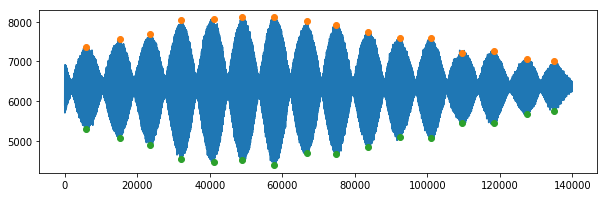

In [106]:
amplitudes = []
min_amp = []
plt.figure(figsize=(10,3))
for i in maxs[1:]:
    span = 500
    max_zpl = max(zpl[i-span:i+span])
    min_zpl = min(zpl[i-span:i+span])
    amplitudes.append(max_zpl)
    min_amp.append(min_zpl)
plt.plot(zpl)
plt.plot(maxs[1:], amplitudes, 'o')
plt.plot(maxs[1:], min_amp, 'o')

#print(list(zip(maxs[1:], amplitudes)))

#print(maxs[1:])
#print(amplitudes)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg', 'ifft', 'random', 'info', 'power', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


min positions: [1538, 10557, 19010, 27334, 36416, 44997, 53430, 62260, 71004, 79341, 88277, 96601, 105501, 114033, 122877, 131075]
max positions: [5901, 15197, 23495, 32066, 41117, 49030, 57709, 66882, 74943, 83783, 92562, 101073, 109510, 118384, 127534, 135054]
average min diff: 8635.8
average max diff: 8635.8


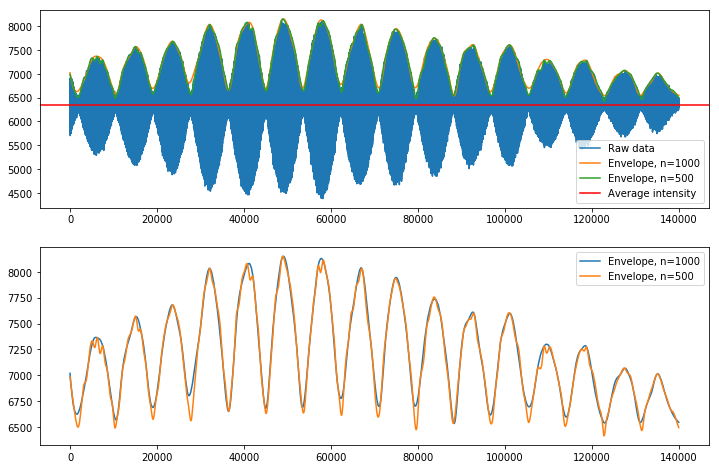

In [7]:
%pylab
%matplotlib inline

from pylab import *
from scipy.fftpack import fft, ifft
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, dst

# For importing CSV into numpy array
from numpy import genfromtxt

fig = plt.figure(figsize=(12,8))
fig.tight_layout()
sub = fig.add_subplot(2,1,1)
zpl = genfromtxt("408-michelson-csv/zpl.csv", delimiter=",")
zpl = zpl[40000 - 1:]
I0  = linspace(0,len(zpl),num=len(zpl))

# Data generated from MATLAB's envelope() function in Signal Processing
zpl_env_1000 = genfromtxt("408-michelson-csv/env1000.csv", delimiter=",")
zpl_env_500  = genfromtxt("408-michelson-csv/env500.csv", delimiter=",")

sub.plot(I0, zpl, label="Raw data")
sub.plot(I0, zpl_env_1000, label="Envelope, n=1000")
sub.plot(I0, zpl_env_500, label="Envelope, n=500")
plt.axhline(sum(zpl)/len(zpl), color='r', label="Average intensity")
sub.legend()

sub = fig.add_subplot(2,1,2)
sub.plot(I0, zpl_env_1000, label="Envelope, n=1000")
sub.plot(I0, zpl_env_500, label="Envelope, n=500")
sub.legend()

fig.show()

min_is = np.where(zpl_env_1000 < 6900)[0]
max_is = np.where(zpl_env_1000 > 6900)[0]

prev = -1
small = -1
big = -1
mins = []

for curr in min_is:
    if small == -1:
        small = curr
    elif (curr - prev) != 1 or curr == min_is[-1]:
        big = prev
        values = zpl_env_1000[small:big+1]
        
        min_i = small + np.where(values == min(values))[0][0]
        mins.append(min_i)
        small = curr
    prev = curr

prev = -1
small = -1
big = -1
maxs = []

for curr in max_is:
    if small == -1:
        small = curr
    elif (curr - prev) != 1 or curr == max_is[-1]:
        big = prev
        values = zpl_env_1000[small:big+1]
        
        max_i = small + np.where(values == max(values))[0][0]
        maxs.append(max_i)
        small = curr
    prev = curr

# print("{}".format(list(zip(range(len(mins)), mins))))
# print("{}".format(list(zip(range(len(maxs[1:])), maxs[1:]))))
print("min positions: {}".format(mins[:-1])) # the last min is a false min
print("max positions: {}".format(maxs[1:])) # the first max is a false maximum

diffs = []
for i in range(len(mins[:-1])):
    if i == 0:
        pass
    else:
        diffs.append(mins[i] - mins[i-1])
        
print("average min diff: {}".format(1.*sum(diffs)/len(diffs)))

diffs = []
for i in range(len(maxs[1:])):
    if i == 0:
        pass
    else:
        diffs.append(mins[i] - mins[i-1])
print("average max diff: {}".format(1.*sum(diffs)/len(diffs)))

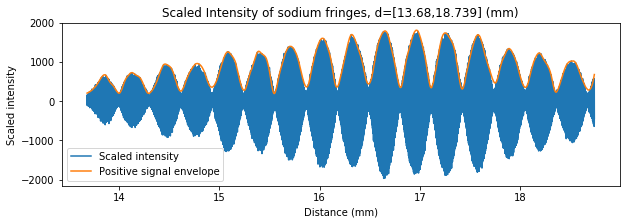

In [104]:
zpl_scaled = zpl - sum(zpl)/len(zpl)
k = 1.081
mm_scaled = linspace(17.335*k, 12.655*k, num=len(zpl))

env_scaled = zpl_env_1000 - sum(zpl)/len(zpl)

plt.figure(figsize=(10,3))
plt.plot(mm_scaled, zpl_scaled,label="Scaled intensity")
plt.plot(mm_scaled, env_scaled,label="Positive signal envelope")
plt.ylabel("Scaled intensity")
plt.xlabel("Distance (mm)")
plt.title("Scaled Intensity of sodium fringes, d=[{},{}] (mm)".format(round(12.655*k,3), round(17.335*k,3)))
plt.legend()
plt.show()

Text(0.5,1,'Intensity of sodium light around ZPL')

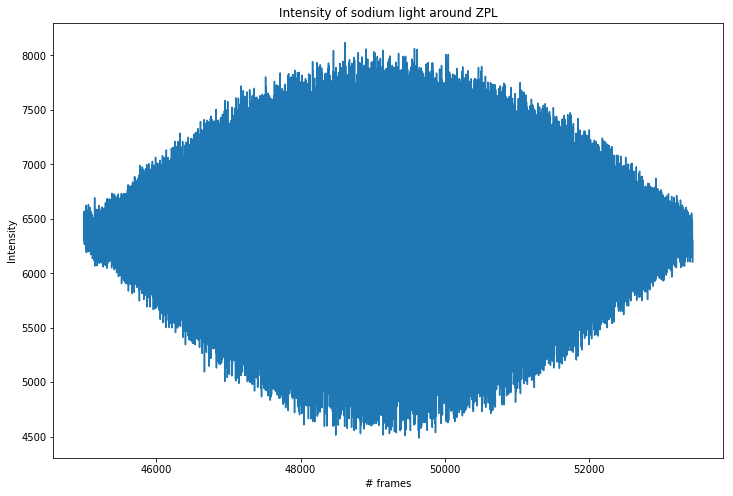

In [9]:
zpl_l = mins[5]
zpl_r = mins[6]
fig = plt.figure(figsize=(12,8))

plt.plot(linspace(zpl_l, zpl_r, num=(zpl_r - zpl_l)), zpl[zpl_l:zpl_r])
plt.xlabel("# frames")
plt.ylabel("Intensity")
plt.title("Intensity of sodium light around ZPL")

58.0
510
57.991470588235295


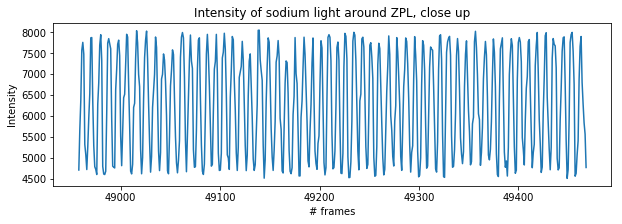

In [101]:
center = (int) ((zpl_l + zpl_r)/2)
span = 255
plt.figure(figsize=(10,3))
plt.plot(linspace(center - span, center + span, num=2*span), zpl[center-span:center+span])
plt.xlabel("# frames")
plt.ylabel("Intensity")
plt.title("Intensity of sodium light around ZPL, close up")

hi = -1
thresh = 6500
count = 0

for i in zpl[center-span:center+span]:
    if hi == -1:
        hi = i > thresh
    elif i > thresh and not hi:
        hi = True
        count += 1
    elif i < thresh and hi:
        hi = False
        count += 1
        
# count holds twice the number of actual peaks
print(count / 2)
print(len(zpl[center-span:center+span]))
print(count/2*509.925/span/2)

0.178374892724 1.360871665806717e-06


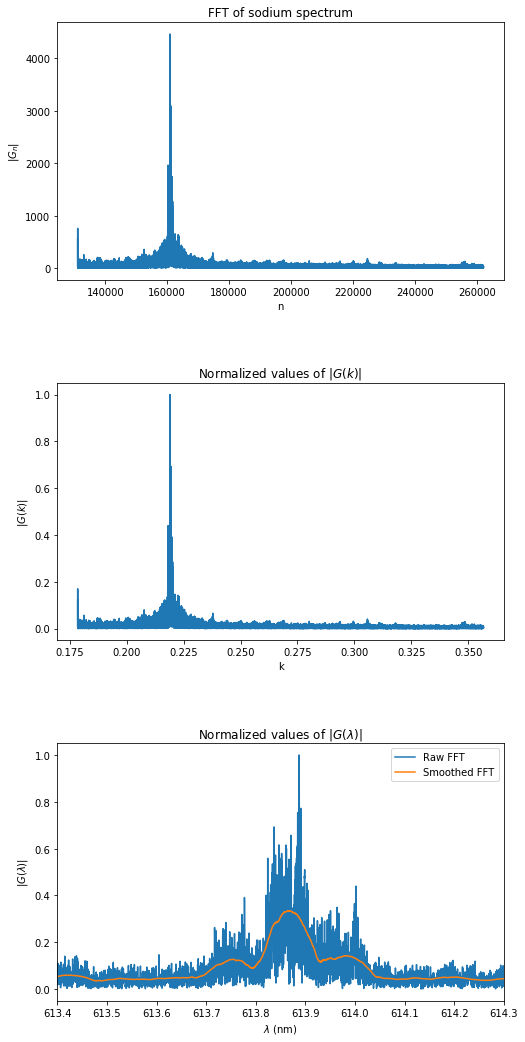

In [98]:
zpl = genfromtxt("408-michelson-csv/zpl.csv", delimiter=",")
zpl = zpl[40000 - 1:]
def next_pow2(x):
    return 1 if x == 0 else (int) (2**np.ceil(np.log2(x)))

target = next_pow2(len(zpl))
padded = np.pad((zpl-mean(zpl))/max(zpl-mean(zpl)), (0,target - len(zpl)), 'constant')
fft_pad = np.absolute(np.fft.fftshift(fft(padded)))
fft_scaled = fft_pad/max(fft_pad)

start = (int) (len(padded)/2+2)
end = len(padded)
n = linspace(start, end, num=end-start)

fig = plt.figure(figsize=(8,18))
fig.tight_layout()
plt.subplots_adjust(hspace=0.4)

sub = fig.add_subplot(3,1,1)
sub.plot(n,fft_pad[start:end])
sub.set_title("FFT of sodium spectrum")
sub.set_ylabel("|$G_n$|")
sub.set_xlabel("n")

delta_k = 2*np.pi/len(zpl)/33 # in 1/nm
k = n * delta_k
print(k[0], delta_k)
sub = fig.add_subplot(3,1,2)
sub.plot(k,fft_scaled[start:end])
sub.set_title("Normalized values of |$G(k)$|")
sub.set_ylabel("|$G(k)$|")
sub.set_xlabel("k")

lamb = 2*np.pi/k + 585.2
sub = fig.add_subplot(3,1,3)
sub.plot(lamb,fft_scaled[start:end], label="Raw FFT")
sub.plot(lamb,savgol_filter(fft_scaled[start:end], 501, 2), label="Smoothed FFT")
sub.set_title("Normalized values of |$G(\lambda)$|")
sub.set_ylabel("|$G(\lambda)$|")
sub.set_xlabel("$\lambda$ (nm)")
sub.set_xlim(613.4,614.3)
sub.legend()

#start_small = 159000
#end_small = 163000
#plt.plot(linspace(start_small, end_small, num=end_small - start_small), np.absolute(np.fft.fftshift(fft(padded)))[start_small:end_small])

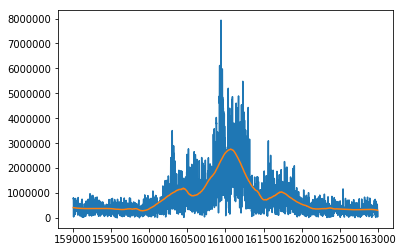

In [31]:
from scipy.signal import savgol_filter

start_small = 159000
end_small = 163000
data = np.absolute(np.fft.fftshift(fft(padded)))[start_small:end_small]
smoothed = savgol_filter(data, 1001, 5)
plt.plot(linspace(start_small, end_small, num=end_small - start_small), data)
plt.plot(linspace(start_small, end_small, num=end_small - start_small), smoothed)

/opt/conda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


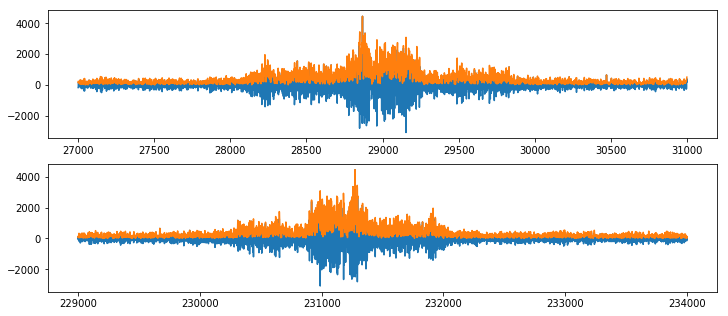

In [59]:
# To get rid of low and high frequency spikes at the beginning/end
fft_zpl = fft(padded)[1001:-1001]
start1, end1 = (27000, 31000)
start2, end2 = (229000, 234000)
fig = plt.figure(figsize=(12,8))
fig.tight_layout()

sub = fig.add_subplot(3,1,1)
sub.plot(linspace(start1, end1, num=end1-start1), fft_zpl[start1:end1])
sub.plot(linspace(start1, end1, num=end1-start1), np.absolute(fft_zpl[start1:end1]))
#sub.plot(linspace(start1, end1, num=end1-start1), np.absolute(np.fft.fftshift(fft_zpl[start1:end1])))

sub = fig.add_subplot(3,1,2)
sub.plot(linspace(start2, end2, num=end2-start2), fft_zpl[start2:end2])
sub.plot(linspace(start2, end2, num=end2-start2), np.absolute(fft_zpl[start2:end2]))
#sub.plot(linspace(start2, end2, num=end2-start2), np.absolute(np.fft.fftshift(fft_zpl[start2:end2])))

0.0965090081117 0.0003740659229135909


Text(0.5,0,'$\\lambda$ (nm)')

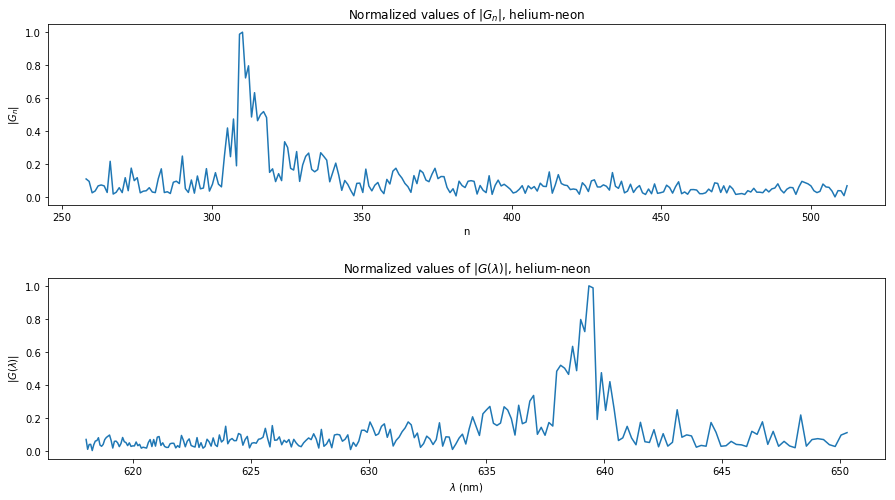

In [88]:
#zpl is actually the HeNe fringing pattern but who cares
zpl = genfromtxt("408-michelson-csv/hene_cal.csv", delimiter=",")

def next_pow2(x):
    return 1 if x == 0 else (int) (2**np.ceil(np.log2(x)))

target = next_pow2(len(zpl))
padded = np.pad((zpl-mean(zpl))/max(zpl-mean(zpl)), (0,target - len(zpl)), 'constant')
fft_pad = np.absolute(np.fft.fftshift(fft(padded)))
fft_scaled = fft_pad/max(fft_pad)

start = (int) (len(padded)/2+2)
end = len(padded)
n = linspace(start, end, num=end-start)

fig = plt.figure(figsize=(15,8))
fig.tight_layout()
plt.subplots_adjust(hspace=0.4)

sub = fig.add_subplot(2,1,1)
sub.plot(n,fft_scaled[start:end])
sub.set_title("Normalized values of |$G_n$|, helium-neon")
sub.set_ylabel("|$G_n$|")
sub.set_xlabel("n")

delta_k = 2*np.pi/len(zpl)/33 # in 1/nm
k = n * delta_k
print(k[0], delta_k)
#sub = fig.add_subplot(3,1,2)
#sub.plot(k,fft_scaled[start:end])
#sub.set_title("Normalized values of |$G(k)$|")
#sub.set_ylabel("|$G(k)$|")
#sub.set_xlabel("k")

lamb = 2*np.pi/k + 585.2
sub = fig.add_subplot(2,1,2)
sub.plot(lamb,fft_scaled[start:end])
sub.set_title("Normalized values of |$G(\lambda)$|, helium-neon")
sub.set_ylabel("|$G(\lambda)$|")
sub.set_xlabel("$\lambda$ (nm)")
#start_small = 159000
#end_small = 163000
#plt.plot(linspace(start_small, end_small, num=end_small - start_small), np.absolute(np.fft.fftshift(fft(padded)))[start_small:end_small])

In [86]:
sav = savgol_filter(fft_scaled[start:end], 11, 2) 
np.where(sav == max(sav))

(array([53]),)

In [87]:
638.2 - 53

585.2

In [ ]:
zpl = genfromtxt("408-michelson-csv/zpl.csv", delimiter=",")
zpl = zpl[40000 - 1:]
def next_pow2(x):
    return 1 if x == 0 else (int) (2**np.ceil(np.log2(x)))

target = next_pow2(len(zpl))
padded = np.pad((zpl-mean(zpl))/max(zpl-mean(zpl)), (0,target - len(zpl)), 'constant')
fft_pad = np.absolute(np.fft.fftshift(fft(padded)))
fft_scaled = fft_pad/max(fft_pad)

start = (int) (len(padded)/2+2)
end = len(padded)
n = linspace(start, end, num=end-start)

fig = plt.figure(figsize=(15,12))
fig.tight_layout()
plt.subplots_adjust(hspace=0.4)

sub = fig.add_subplot(3,1,1)
sub.plot(n,fft_scaled[start:end])
sub.set_title("Normalized values of |$G_n$|")
sub.set_ylabel("|$G_n$|")
sub.set_xlabel("n")

delta_k = 2*np.pi/len(zpl)/33 # in 1/nm
k = n * delta_k
print(k[0], delta_k)
sub = fig.add_subplot(3,1,2)
sub.plot(k,fft_scaled[start:end])
sub.set_title("Normalized values of |$G(k)$|")
sub.set_ylabel("|$G(k)$|")
sub.set_xlabel("k")

lamb = 2*np.pi/k + 585.2
sub = fig.add_subplot(3,1,3)
sub.plot(lamb,fft_scaled[start:end], label="Raw FFT")
sub.plot(lamb,savgol_filter(fft_scaled[start:end], 501, 2), label="Smoothed FFT")
sub.set_title("Normalized values of |$G(\lambda)$|")
sub.set_ylabel("|$G(\lambda)$|")
sub.set_xlabel("$\lambda$ (nm)")
sub.set_xlim(585.2+28,585.2+29.5)
sub.legend()

#start_small = 159000
#end_small = 163000
#plt.plot(linspace(start_small, end_small, num=end_small - start_small), np.absolute(np.fft.fftshift(fft(padded)))[start_small:end_small])

#zpl is actually the HeNe fringing pattern but who cares
zpl = genfromtxt("408-michelson-csv/hene_cal.csv", delimiter=",")

def next_pow2(x):
    return 1 if x == 0 else (int) (2**np.ceil(np.log2(x)))

target = next_pow2(len(zpl))
padded = np.pad((zpl-mean(zpl))/max(zpl-mean(zpl)), (0,target - len(zpl)), 'constant')
fft_pad = np.absolute(np.fft.fftshift(fft(padded)))
fft_scaled = fft_pad/max(fft_pad)

start = (int) (len(padded)/2+2)
end = len(padded)
n = linspace(start, end, num=end-start)

fig = plt.figure(figsize=(15,8))
fig.tight_layout()
plt.subplots_adjust(hspace=0.4)

sub = fig.add_subplot(2,1,1)
sub.plot(n,fft_scaled[start:end])
sub.set_title("Normalized values of |$G_n$|, helium-neon")
sub.set_ylabel("|$G_n$|")
sub.set_xlabel("n")

delta_k = 2*np.pi/len(zpl)/33 # in 1/nm
k = n * delta_k
print(k[0], delta_k)
#sub = fig.add_subplot(3,1,2)
#sub.plot(k,fft_scaled[start:end])
#sub.set_title("Normalized values of |$G(k)$|")
#sub.set_ylabel("|$G(k)$|")
#sub.set_xlabel("k")

lamb = 2*np.pi/k + 585.2
sub = fig.add_subplot(2,1,2)
sub.plot(lamb,fft_scaled[start:end])
sub.set_title("Normalized values of |$G(\lambda)$|, helium-neon")
sub.set_ylabel("|$G(\lambda)$|")
sub.set_xlabel("$\lambda$ (nm)")
#start_small = 159000
#end_small = 163000
#plt.plot(linspace(start_small, end_small, num=end_small - start_small), np.absolute(np.fft.fftshift(fft(padded)))[start_small:end_small])